__<h1 style='text-align: center;'> Sluttfarten til en kule i en rullebane </h1>__
<h4 style='text-align: center;'>L. B. Dahl, O. H. Hansen, J. O. Karlsen, N. M. Meland, M. Presthagen, O. P. Rasmussen</h4>

_<p style='te*******x*******t-align: center;'>Institutt for fysikk, Norges teknisk-naturvitenskapelige universitet, 7491 Trondheim.</p>_



***
### __Sammendrag__

Denne rapporten forklarer de fysiske kreftene som virker på en kule i en rullebane med varierende krumning. Scipys interpoleringsfunksjon Cubicspline er blitt brukt for å generere banen. Python er benyttet til å beregne størrelsen på både eksperimentell data og de numeriske verdiene. Videre undersøkes og presenteres resultatene for sluttfart og tidsbruk, samt forholdet mellom friksjonskraft og normalkraft. Når det kommer til slutthastighet ligger resultatet fra den numeriske utregningen innenfor det beregnede standardavviket fra forsøkene. Ved numerisk utregning ble sluttfarten beregnet til 1.516 m/s, mens gjennomsnittlig sluttfart basert på forsøkene ble beregnet til 1.508 ± 0.028 m/s. Det kan være flere årsaker til standardavviket, eksempelvis feil i gjennomføringen av forsøkene eller feil i metodene brukt til beregninger.

***

### __1. Introduksjon__

Dette prosjektet har gått ut på å studere en kule som ruller, uten glidning ned en bane. Banen ble konstruert med åtte punkter plassert i jevne avstander på 0,2 meter. Hvert punkt hadde en distinkt høyde, men oversteg aldri startpunktets høyde på 0,3 meter. Med banen som grunnlag, anvendte vi teoretiske formler til å beregne tidsavhengige funksjoner for farten, helningsvinkelen, normalkraften og friksjonskraften. Videre ble ti eksperimentelle forsøk gjennomført. Disse ble benyttet til sammenligning til de teoretiske beregningene.

### __2. Teori__

Med utgangspunkt i baneformen $y'(x)$ og dens 1. deriverte $y'(x)$ og 2. deriverte $y''(x)$ kan det utledes bestemte størrelser for et objekt som ruller ned banen.
$\begin{equation}
\mathit{E_k} = \mathit{E_{trans}} + \mathit{E_{rot}} = \frac{1}{2} m v^2 + \frac{1}{2} I \omega^2 \tag{1}
\end{equation}$
I ligning (1) settes den totale kinetiske energien $\mathit{E_k}$, som summen av transalsjonsenergien $\mathit{E_{trans}}$ rotasjonsenergien $\mathit{E_{rot}}$. Videre defineres $v$ som massesenteres fart, $w$ som rotasjonsfarten, $m$ som objektets masse og treghetsmomentet $I$ er gitt ved
$\begin{equation}
I = c m r^2 \tag{2}
\end{equation}$
I ligning (2) er $r$ objektets radius og $c$ en konstant avhengig av objektets massefordeling.

I startpunktet ($x = 0$) vil rotasjonsfarten og massesenterets fart være lik null som fører til total kinetisk energi lik null. I banens laveste punkt vil den potensielle energien være lik null. Med utganspunkt i at objektet ruller uten å slure ($v = r * w$) og at den mekanisk energi er bevart samt de nevnte grenseverdiene kan farten uteledes som
$\begin{equation}
v(x) = \sqrt{\frac{2g(y_0 - y(x))}{1 + c}} \tag{3}
\end{equation}$
I ligning (3) er $v(x)$ massesenterets fart med hensyn på den horisontale posisjonen $x$. Videre defineres $g$ som tyngdeakselerasjonen, $\mathit{y_0}$ som starthøyden og $y(x)$ som høyden med hensyn på $x$.



Banens krumning k kan utrykkes som 
$\begin{equation}
k = \frac{1}{R} = \frac{y''}{(1 + (y')^2)^{3/2}} \tag{4}
\end{equation}$
I ligning (4) er krumningen lik inversen til krumningsradien $R$ og det følger fra dette at sentripitalakselerasjonen $a_{\text{ort}}$ er lik
$\begin{equation}
a_{\text{ort}} = \frac{v^2}{R} = v^2k = \frac{2g(y_0 - y)}{1 + c} \cdot \frac{y''}{(1 + (y')^2)^{3/2}} \tag{5}
\end{equation}$



Ved å ta i bruk Newtons 2. lov normalt på banen er 
$\begin{equation}
 \sum F_{\text{ort}} = m \cdot a_{\text{ort}} \tag{6}
\end{equation}$
I ligning (6) er  $\sum F_{\text{ort}}$ summen av kreftene normalt på banen. Fra dette kan normalkraften $N(x)$ utrykkes som 
$\begin{equation}
 N(x) = m(g\cos(B(x)) + a_{\text{ort}}) \tag{7}
\end{equation}$
I ligning (7) er $B(x)$ helningsvinkelen uttrykt som 
$\begin{equation}
 B(x) = \arctan(y'(x))\tag{8}
\end{equation}$



Ved å ta i bruk Newtons 2. lov i tangentiell retning og grunleggende rotasjonsmekanikk utledes ligningene 
$\begin{equation}
 -mg\sin(B) + F = ma \tag{9}
\end{equation}$
og
$\begin{equation}
 \tau = r \cdot F = I \cdot \alpha \tag{10}
\end{equation}$
I ligning (9) er $F(x)$ friksjonskraften og i ligning (10) er $\tau$ kraftmomentet og $\alpha$ rotasjonsaksellerasjonen. Ved å kombinere ligning (9) og ligning (10) samt at det ved ren rulling følger at aksellerasjon er lik produktet av radius og rotasjonsaksellerasjon ($a = r*\alpha$) er 
$\begin{equation}
 a(x) = -\frac{g\sin(B)}{1+c} \tag{11}
\end{equation}$
Fra ligning (9) og ligning (11) følger det at
$\begin{equation}
 F(x) = \frac{c \cdot m \cdot g \cdot \sin(B)}{1 + c} \tag{11}
\end{equation}$


### __3. Metode__
#### Valg av Bane og Numeriske Beregninger

Første del av forsøket fokuserte på å identifisere en passende bane og utføre numeriske beregninger basert på denne. Vi brukte programmet `CubicSpline.py`, som fulgte med oppgavebeskrivelsen, for å generere en krum bane. Dette programmet bestemmer tilfeldig høyden til åtte festepunkter langs banen. Festepunktene er 200mm fra hverandre og kurven oppfyller disse egenskapene:
<li> Kula kommer seg gjennom hele banen, </li> 
<li> Banen hele veien har så liten helningsvinkel at kula ikke glir, </li>
<li> Banen faktisk er en berg-og-dal-bane, med både berg (bakketopp) og dal (bunnpunkt) underveis. </li>

Etter noen forsøk, endte vi opp med følgende festepunkter for kurven:

| Index | x (mm) | y (mm) |
|-------|--------|--------|
| 0     | 0      | 300    |
| 1     | 200    | 257    |
| 2     | 400    | 171    |
| 3     | 600    | 152    |
| 4     | 800    | 213    |
| 5     | 1000   | 214    |
| 6     | 1200   | 144    |
| 7     | 1400   | 136    |


For å interpolere disse åtte punktene brukte vi funksjonen `CubicSpline` fra Python-biblioteket Scipy. Denne funksjonen interpolerer over datapunktene i tabellen over og genererer en ny Python-funksjon som tar x-verdi som input og gir ut tilhørende y-verdi. Altså fyller den ut tomrommet mellom festepunktene vi genererte tidligere. Banen ble deretter visualisert ved hjelp av `matplotlib.pyplot` hver gang programmet ble kjørt. Den endelige banen er illustrert nedenfor.

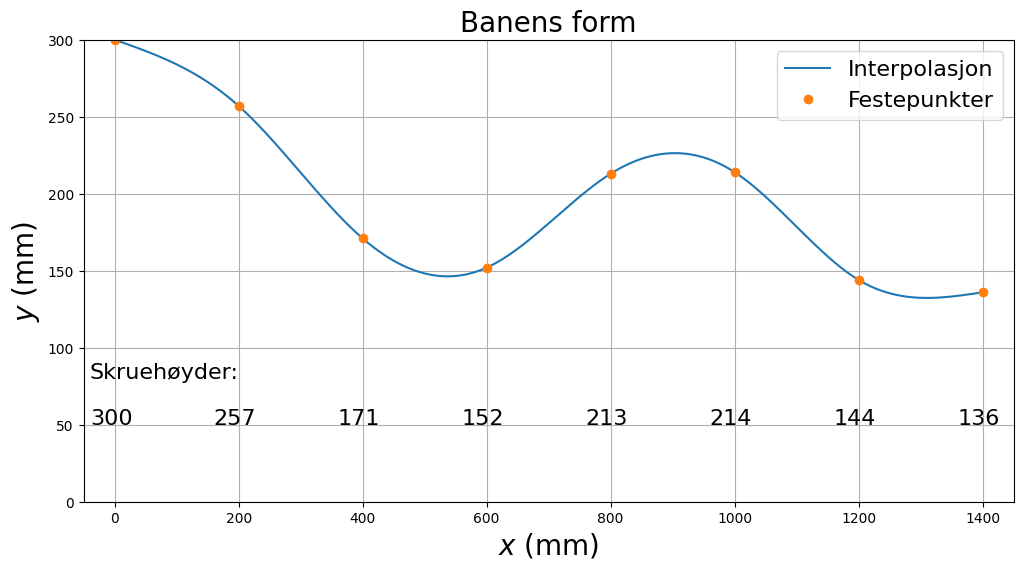

In [17]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline

h = 200
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
yfast = np.array([300, 257, 171, 152, 213, 214, 144, 136])

cs = CubicSpline(xfast,yfast,bc_type='natural')

xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)

y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)

baneform = plt.figure('y(x)',figsize=(12,6))
plt.plot(x,y, label='Interpolasjon')
plt.plot(xfast,yfast,'o', label='Festepunkter')
plt.legend(loc='best',fontsize=16)
plt.title('Banens form', fontsize=20)
plt.xlabel('$x$ (mm)',fontsize=20)
plt.ylabel('$y$ (mm)',fontsize=20)
plt.text(-40,80,'Skruehøyder:', fontsize=16)
for i, skruehoyde in enumerate(yfast):
    plt.text(-40 + i*200,50,int(skruehoyde),fontsize=16)
plt.ylim(0,300)
plt.xlim(-50,1450)
plt.grid()
plt.show()


For å beregne relevante numeriske verdier, brukte vi formlene som ble introdusert i teori-avsnittet. Vi regnet ut x- og y-verdier ved hver hele millimeter langs x-aksen, og lagret dem i to lister. For x-listen betyr dette ganske enkelt at den inneholdt tallene fra 0 til og med 1400 i kronologisk rekkefølge, mens y-listen inneholdt de respektive y-verdiene for hver av disse x-verdiene, kalkulert ut ifra interpolasjonen gitt av `CubicSpline`. Disse verdiene, i kombinasjon med energibevaringslover, ble brukt til å regne ut fart, sentripetalakselerasjon, normalkraft og krumning.

#### Eksperimentell Gjennomføring

For den eksperimentelle delen av forsøket, ble oppsettet konstruert i henhold til de åtte valgte festepunktene, som vist i Figur 3. En meterstokk ble brukt for å sikre korrekt lengdeforhold i måleprogrammet. Objektet som ble brukt i forsøket var en liten, svart gummikule med en masse på 30 ± 0.5 g.

Hvert forsøk ble filmet med en frekvens på 60 fps og analysert ved hjelp av `Tracker`-programmet. Dette programmet lar oss spore objektets bevegelse over tid og måle viktige parametre. Ti forsøk ble gjennomført, og for hvert forsøk ble data for x, y, t, og v lagret i en fil på tekstformat. Dette gjorde det enkelt å få tilgang til dataene i Python for videre analyse. De eksperimentelle verdiene ble beregnet på samme måte som de teoretiske verdiene, og deretter sammenlignet med hverandre.

### __4. Resultater__

Her kommer resultater

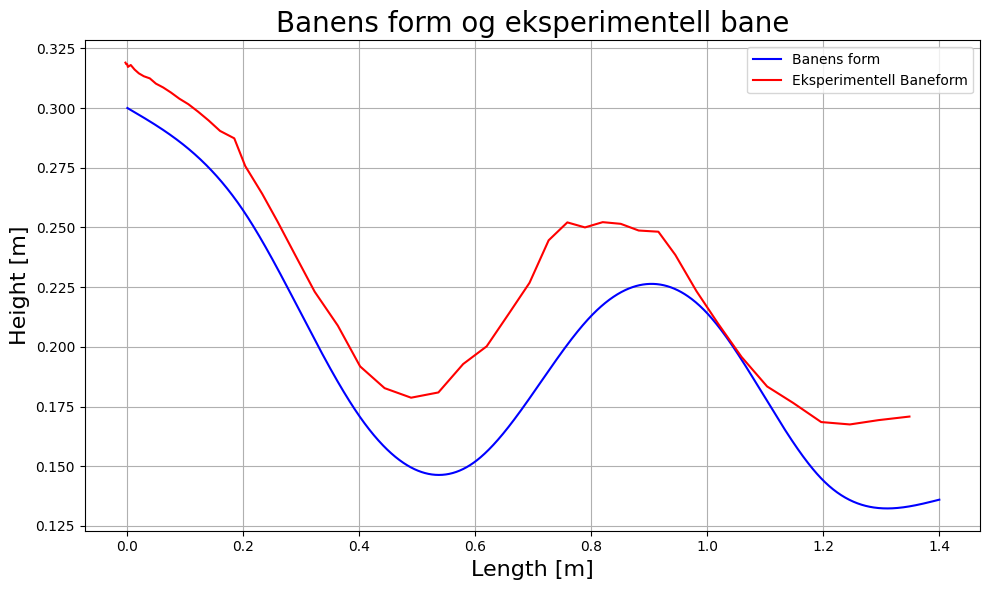

In [304]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd

# Code for "Banens form"
h = 200
xfast = np.asarray([0, 1, 2, 3, 4, 5, 6, 7]) * h / 1000  # Convert to meters
xmin = 0
xmax = 1.401  # Convert to meters
dx = 0.001  # Convert to meters
x = np.arange(xmin, xmax, dx)
yfast = np.array([300, 257, 171, 152, 213, 214, 144, 136]) / 1000  # Convert to meters
cs = CubicSpline(xfast, yfast, bc_type='natural')
y = cs(x)
dy = cs(x, 1)
d2y = cs(x, 2)

# Experimental data (kept in millimeters)
data = pd.read_csv('Testresultater.txt', sep=';')
x_exp = np.array(data['x'])   # Convert to meters
y_exp = np.array(data['y'])  # Keep y_exp in millimeters
v_exp = np.array(data['v'])  # Already in m/s

# Create a single figure for both plots
plt.figure(figsize=(10, 6))

# Plot "Banens form" in blue
plt.plot(x, y, label='Banens form', color='blue')

# Plot the experimental data in red
plt.plot(x_exp, y_exp, label='Eksperimentell Baneform', color='red')

plt.xlabel('Length [m]', fontsize=16)
plt.ylabel('Height [m]', fontsize=16)
plt.title('Banens form og eksperimentell bane', fontsize=20)
plt.grid()
plt.legend()

# Show the combined plot
plt.tight_layout()
plt.show()

# You can continue with the velocity calculation and plotting, which remains the same as before.


<Figure size 1200x600 with 0 Axes>

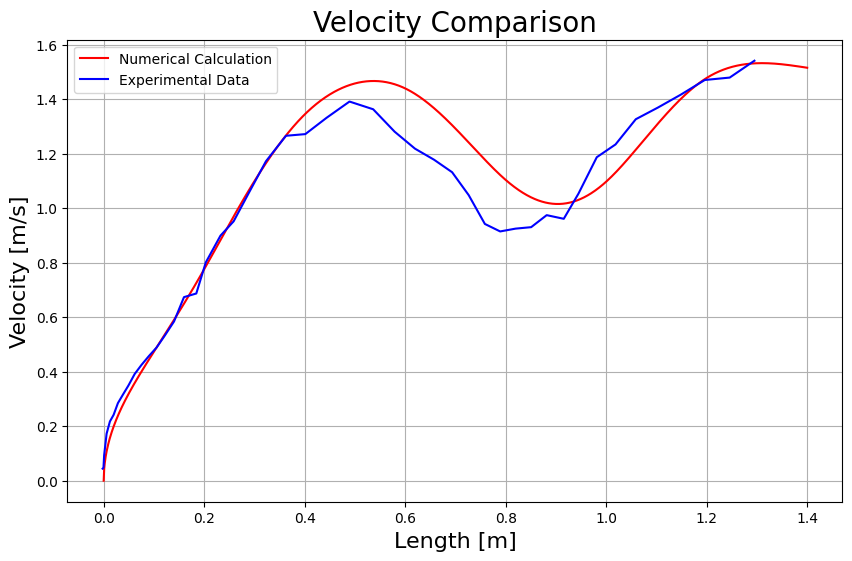

1.516028646544272
0.04987404


In [305]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import CubicSpline
import pandas as pd

h = 200/1000
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1401
dx = 1
x = np.arange(xmin,xmax,dx)/1000
#Skruehøyder:
yfast = np.array([300, 257, 171, 152, 213, 214, 144, 136])
cs = CubicSpline(xfast,yfast,bc_type='natural')
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)
baneform = plt.figure('y(x)',figsize=(12,6))
# Your code for calculating and plotting velocity
c = 2/5
g = 9810
y0 = 300
vy = np.sqrt((2 * g * (y0 - y)) / (1 + c))/1000

# Experimental data
data = pd.read_csv('Testresultater.txt', sep=';')
x_exp = np.array(data['x'])  # Convert x_exp from meters to millimeters
y_exp = np.array(data['y'])  # Convert y_exp from meters to millimeters
v_exp = np.array(data['v'])  # Convert v_exp from m/s to mm/s

# Create a single figure for both plots
plt.figure(figsize=(10, 6))

# Plot the numerical calculation of velocity in red
plt.plot(x, vy, label="Numerical Calculation", color='red')

# Plot the experimental data in blue
plt.plot(x_exp, v_exp, label='Experimental Data', color='blue')

plt.xlabel('Length [m]', fontsize=16)
plt.ylabel('Velocity [m/s]', fontsize=16)
plt.title('Velocity Comparison', fontsize=20)
plt.grid()
plt.legend()

# Show the combined plot
plt.show()

sluttfart = vy[-1] * 10**(-3)
Kinetisk_verdi = ((1 + c) / 2) * 0.031 * (sluttfart) ** 2
print(Kinetisk_verdi)


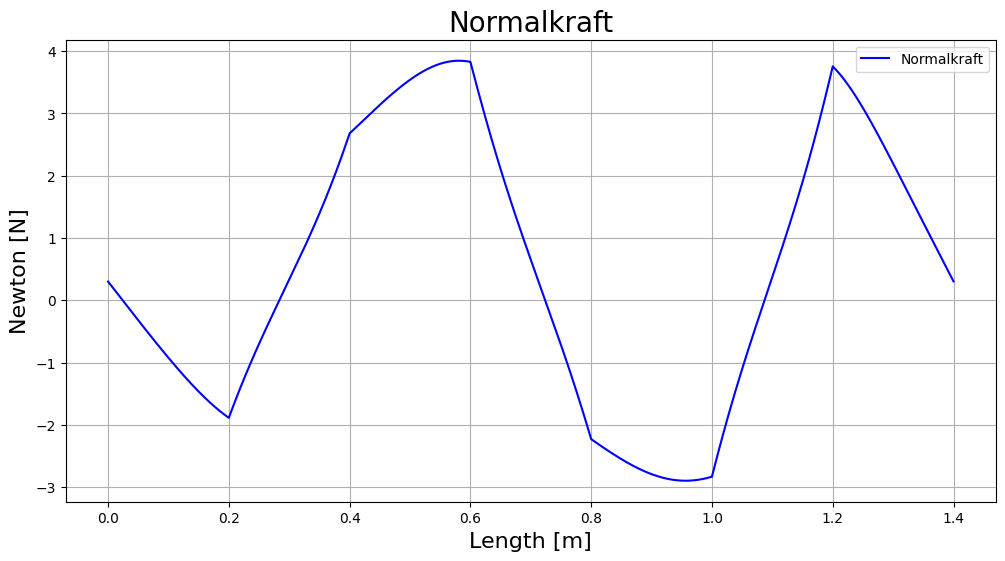

In [306]:
#Normalkraft

h = 200/1000
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1401/1000
dx = 1/1000
x = np.arange(xmin,xmax,dx)
#Skruehøyder:
yfast = np.array([0.300, 0.257, 0.171, 0.152, 0.213, 0.214, 0.144, 0.136])
cs = CubicSpline(xfast,yfast,bc_type='natural')
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)
baneform = plt.figure('y(x)',figsize=(12,6))
# Your code for calculating and plotting velocity
c = 2/5
g = 9.810
y0 = 3
vy = np.sqrt((2 * g * (y0 - y)) / (1 + c))/1000
vy = np.sqrt((10 * g * (y0 - y)) / (7))

# Experimental data
data = pd.read_csv('Testresultater.txt', sep=';')
x_exp = np.array(data['x'])  # Convert x_exp from meters to millimeters
y_exp = np.array(data['y'])  # Convert y_exp from meters to millimeters
v_exp = np.array(data['v'])  # Convert v_exp from m/s to mm/s

kx = d2y/((1+dy**2)**(3/2))
aort = vy**2*kx 

Bx =  np.arctan(dy)
Nx= 0.031*((g*np.cos(Bx)+aort))

plt.plot(x,Nx, label='Normalkraft', color='blue')

plt.xlabel('Length [m]', fontsize=16)
plt.ylabel('Newton [N]', fontsize=16)
plt.title('Normalkraft', fontsize=20)
plt.grid()
plt.legend()

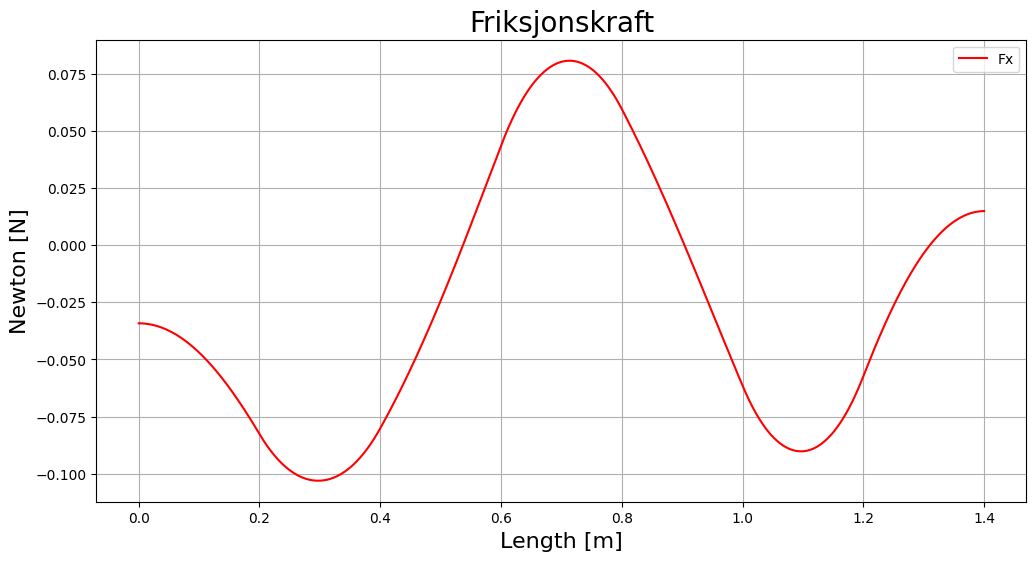

In [307]:
#Normalkraft

h = 200/1000
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1401/1000
dx = 1/1000
x = np.arange(xmin,xmax,dx)
#Skruehøyder:
yfast = np.array([0.300, 0.257, 0.171, 0.152, 0.213, 0.214, 0.144, 0.136])
cs = CubicSpline(xfast,yfast,bc_type='natural')
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)
baneform = plt.figure('y(x)',figsize=(12,6))
# Your code for calculating and plotting velocity
c = 2/5
g = 9.810
y0 = 3
vy = np.sqrt((2 * g * (y0 - y)) / (1 + c))/1000

# Experimental data
data = pd.read_csv('Testresultater.txt', sep=';')
x_exp = np.array(data['x'])  # Convert x_exp from meters to millimeters
y_exp = np.array(data['y'])  # Convert y_exp from meters to millimeters
v_exp = np.array(data['v'])  # Convert v_exp from m/s to mm/s

kx = d2y/((1+dy**2)**(3/2))
aort = vy**2*kx 

Bx =  np.arctan(dy)
Nx= 0.031*((g*np.cos(Bx)+aort))

Fx = (c/1+c)*0.031*g*np.sin(Bx)

plt.plot(x,Fx, label='Fx', color='red')

plt.xlabel('Length [m]', fontsize=16)
plt.ylabel('Newton [N]', fontsize=16)
plt.title('Friksjonskraft', fontsize=20)
plt.grid()
plt.legend()

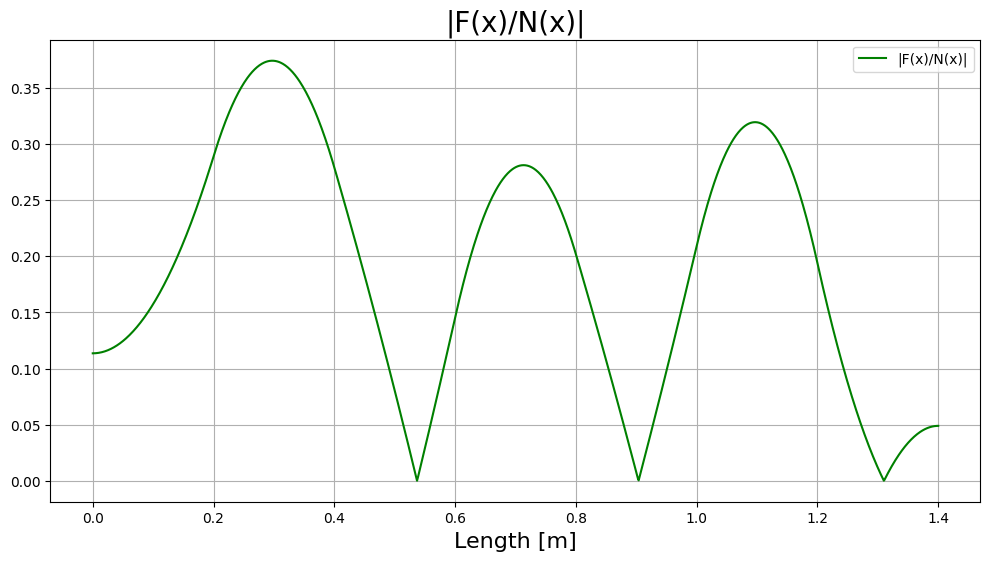

In [308]:
#Normalkraft

h = 200/1000
xfast=np.asarray([0,1,2,3,4,5,6,7])*h
xmin = 0
xmax = 1401/1000
dx = 1/1000
x = np.arange(xmin,xmax,dx)
#Skruehøyder:
yfast = np.array([0.300, 0.257, 0.171, 0.152, 0.213, 0.214, 0.144, 0.136])
cs = CubicSpline(xfast,yfast,bc_type='natural')
y = cs(x)
dy = cs(x,1)
d2y = cs(x,2)
baneform = plt.figure('y(x)',figsize=(12,6))
# Your code for calculating and plotting velocity
c = 2/5
g = 9.810
y0 = 3
vy = np.sqrt((2 * g * (y0 - y)) / (1 + c))/1000

# Experimental data
data = pd.read_csv('Testresultater.txt', sep=';')
x_exp = np.array(data['x'])  # Convert x_exp from meters to millimeters
y_exp = np.array(data['y'])  # Convert y_exp from meters to millimeters
v_exp = np.array(data['v'])  # Convert v_exp from m/s to mm/s

kx = d2y/((1+dy**2)**(3/2))
aort = vy**2*kx 

Bx =  np.arctan(dy)
Nx= 0.031*((g*np.cos(Bx)+aort))

Fx = (c/1+c)*0.031*g*np.sin(Bx)

forhold = abs(Fx/Nx)

plt.plot(x,forhold, label='|F(x)/N(x)|', color='green')

plt.xlabel('Length [m]', fontsize=16)
plt.title('|F(x)/N(x)|', fontsize=20)
plt.grid()
plt.legend()

test
### __4. Resultater__

 Forsøk | v [m/s]
 ------- | ------ 
 1       | 1.514  
 2       | 1.491  
 3       | 1.514  
 4       | 1.525  
 5       | 1.486  
 6       | 1.465  
 7       | 1.568  
 8       | 1.519  
 9       | 1.490  
 10      | 1.511  
| Gjennomsnitt:   | 1.508 |
| Standardavvik   | 0.028 |
| Numerisk        | 1.516  |

Hei

| Forsøk | t [s] |
| ------ | ------- |
| 1      | 1.600   |
| 2      | 1.600   |
| 3      | 1.533   |
| 4      | 1.600   |
| 5      | 1.633  |
| 6      | 1.600   |
| 7      | 1.600   |
| 8      | 1.566   |
| 9      | 1.600   |
| 10     | 1.600   |
| Gjennomsnitt: | 1.593 |
| Standardavvik | 0.026 |
| Numerisk | 1.569 |

Hei og hopp

| Forsøk | E_k [J] |
| ------ | ------- |
| 1      | 0.036   |
| 2      | 0.034   |
| 3      |  0.036   |
| 4      | 0.036   |
| 5      | 0.034  |
| 6      | 0.033   |
| 7      | 0.038  |
| 8      | 0.035   |
| 9      | 0.034   |
| 10     | 0.035   |
| Gjennomsnitt: | 0.036 |
| Standardavvik | 0.001|
| Numerisk | 0.035|

Nei

| Forsøk | Tap av kinetisk energi [J] |
| ------ | -------------------------- |
| 1      | 0.014                     |
| 2      | 0.015                    |
| 3      | 0.014                     |
| 4      |  0.014                    |
| 5      | 0.016                     |
| 6      | 0.017                     |
| 7      | 0.011                 |
| 8      | 0.014                      |
| 9      | 0.015                   |
| 10     | 0.014                    |
| Gjennomsnitt: | 0.015                 |
| Standardavvik | 0.001               |


### __5. Diskusjon__

Her kommer en diskusjon

### __6. Konklusjon__

Basert på de 10 målingene vi gjorde beregnet vi den gjennomsnittelige slutthastigheten $\bar v=1.508\pm0.028$ m/s. Vi beregnet sluttfarten numerisk til å være 1.516 m/s, noe som vil si at den ligger innenfor standardavviket fra vår eksperimentelle slutthastighet. Dette tyder på at arbeidet har vært nøyaktig og beregningene riktig. Det er alikevel rimelig å anta at det har vært noen feilkilder i prosessen. Det at vi benyttet privat mobil og Tracker kan antageligvis føre til betydelige målefeil. Med tanke på hvilket utstyr man hadde tilgjengelig og metode mener vi at vi kan konkludere med at standardavviket ligger innenfor hva man kan forvente. Vi mener det er gode sammenhenger mellom våre numeriske og eksperimentelle resultater.


### __Referanser__

Referanseliste her